##### Data import and preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('sample_data.csv')
print ("data imported")

data imported


In [3]:
#Dimensions of data
print("No. of Rows: {}".format(data.shape[0]))
print("No. of Columns: {}".format(data.shape[1]))

No. of Rows: 4012
No. of Columns: 7


In [4]:
data.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index
0,24-12-2015 00:00,8192,2655,2790,19:00:00,20-02-2016 00:00,1.28547
1,2/1/2016 0:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
2,26-12-2015 00:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
3,13-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,1.92834
4,25-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,0.64260


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 7 columns):
order_date                 4012 non-null object
route_no                   4012 non-null int64
from_stop                  4012 non-null int64
to_stop                    4012 non-null int64
departure_time             4012 non-null object
travel_date                4012 non-null object
passengers_booked_index    4012 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 219.5+ KB


In [6]:
data.describe()

,route_no,from_stop,to_stop,passengers_booked_index
count,4012.000000,4012.000000,4012.000000,4012.000000
mean,75094.020937,3409.501496,3266.111665,2.094505
std,67164.734847,1939.082936,1635.676635,2.186126
min,8192.000000,2655.000000,2655.000000,0.642600
25%,9288.000000,2655.000000,2655.000000,0.642600
50%,63912.000000,2655.000000,2790.000000,1.285470
75%,63916.000000,2790.000000,2790.000000,2.571210
max,226556.000000,9540.000000,8370.000000,17.356950


In [7]:
data.describe(include=['object'])

,order_date,departure_time,travel_date
count,4012,4012,4012
unique,319,6,220
top,18-06-2016 00:00,11:00:00,26-06-2016 00:00
freq,45,1927,72


In [8]:
#clean whitespaces in columns names if any
data.columns = [each.strip() for each in data.columns]
data.columns

Index(['order_date', 'route_no', 'from_stop', 'to_stop', 'departure_time',
       'travel_date', 'passengers_booked_index'],
      dtype='object')

In [9]:
#clean whitespaces in 'object' columns
data.apply( lambda x: x.str.strip() if x.dtypes == 'object' else x )
data.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index
0,24-12-2015 00:00,8192,2655,2790,19:00:00,20-02-2016 00:00,1.28547
1,2/1/2016 0:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
2,26-12-2015 00:00,8192,2655,2790,19:00:00,6/2/2016 0:00,0.64260
3,13-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,1.92834
4,25-03-2016 00:00,8192,2655,2790,19:00:00,12/5/2016 0:00,0.64260


In [10]:
#check for missing values
data.isna().sum()

order_date                 0
route_no                   0
from_stop                  0
to_stop                    0
departure_time             0
travel_date                0
passengers_booked_index    0
dtype: int64

In [11]:
#check for dtypes of columns
data.dtypes

order_date                  object
route_no                     int64
from_stop                    int64
to_stop                      int64
departure_time              object
travel_date                 object
passengers_booked_index    float64
dtype: object

In [12]:
#order_date, departure_time,travel_date should be datetime objects
date_cols = ['order_date','travel_date']
for each in date_cols:
    data[each] = pd.to_datetime(data[each])        
data.dtypes

order_date                 datetime64[ns]
route_no                            int64
from_stop                           int64
to_stop                             int64
departure_time                     object
travel_date                datetime64[ns]
passengers_booked_index           float64
dtype: object

In [13]:
#converting 'departure_time' to time object
data['departure_time'] =pd.to_timedelta(data['departure_time'].str.strip())

##### How many days before the travel date do passengers book their tickets?

**advanceDays** = no. of days before the travel date passengers book their tickets

In [14]:
#converting 'advanceDays' to datetime object
data['advanceDays'] = (data['travel_date'] - data['order_date']).astype('timedelta64[D]')

In [15]:
data.advanceDays.value_counts().sort_index()

-320.0    1
-304.0    2
-293.0    1
-292.0    3
-291.0    2
         ..
 335.0    3
 338.0    1
 352.0    1
 367.0    1
 386.0    1
Name: advanceDays, Length: 413, dtype: int64

In [16]:
data_anomaly = data.loc[data.advanceDays < 0]

In [17]:
data_anomaly.shape

(851, 8)

In [18]:
data_anomaly.advanceDays.min(), data_anomaly.advanceDays.max()

(-320.0, -7.0)

In [19]:
data.loc[data.advanceDays < 0].count()

order_date                 851
route_no                   851
from_stop                  851
to_stop                    851
departure_time             851
travel_date                851
passengers_booked_index    851
advanceDays                851
dtype: int64

**'advanceDays' is having negative values which have to be dropped**

In [20]:
cleanData = data.loc[data.advanceDays >=0]

In [21]:
#Dimensions of data after removing anomaly rows
print("No. of Rows: {}".format(cleanData.shape[0]))
print("No. of Columns: {}".format(cleanData.shape[1]))

No. of Rows: 3161
No. of Columns: 8


In [22]:
cleanData.advanceDays.value_counts().head()

0.0    392
1.0    223
2.0    192
3.0    162
4.0    140
Name: advanceDays, dtype: int64

###### Distribution of advance bookings

In [23]:
print("Min no. of days people book tickets in advance {}".format(cleanData.advanceDays.min()))
print("Max no. of days people book tickets in advance {}".format(cleanData.advanceDays.max()))

Min no. of days people book tickets in advance 0.0
Max no. of days people book tickets in advance 386.0


Passengers tend to book tickets in advance as **early as 386 days i.e. ~13 months** before travel or as **late as 0 days** i.e. on the day of travel

##### How does above distribution vary across routes and departure times?

In [24]:
cleanData.route_no.value_counts(dropna = False).sort_values()

226556     85
190716    271
190808    300
9288      449
8192      507
63912     768
63916     781
Name: route_no, dtype: int64

###### MostFrequentRoute & LeastFrequentRoute

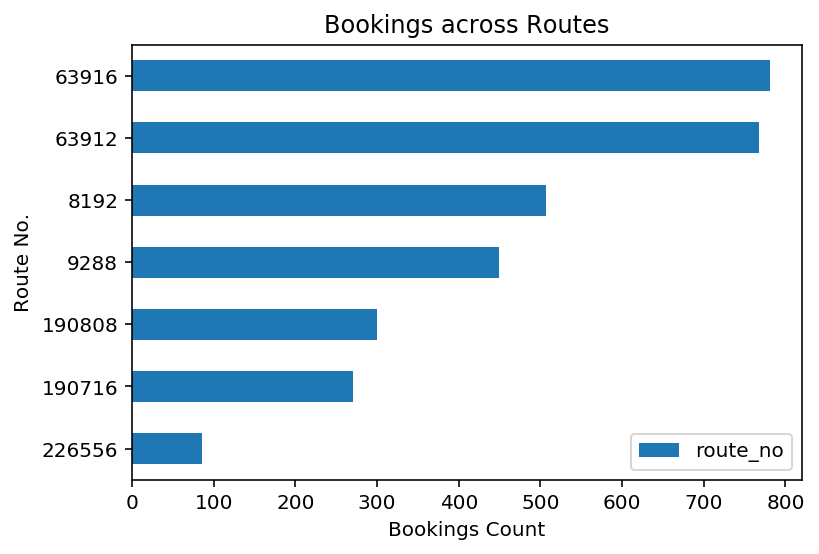

In [25]:
plt.xlabel('Bookings Count')
plt.ylabel('Route No.')
plt.title('Bookings across Routes')
cleanData.route_no.value_counts(dropna = False).sort_values().plot(kind = 'barh', legend = True)

**63916** & **63912** are the **most frequent routes** and **226556** is the **least frequent route**

In [26]:
pd.pivot_table(cleanData,index = ["route_no","from_stop","to_stop","departure_time"], values = ["advanceDays"], aggfunc = len)

,,,,advanceDays
route_no,from_stop,to_stop,departure_time,
8192,2655,2790,19:00:00,507.0
9288,2655,2790,18:30:00,449.0
63912,2655,2790,11:00:00,768.0
63916,2790,2655,11:00:00,781.0
190716,2655,8370,10:15:00,271.0
190808,8370,2655,12:00:00,300.0
226556,9540,2925,07:00:00,85.0


- **63912 & 63916** are the same routes; travelling between the same stops
- **8192, 9288 & 63912** serve the same route from stop 2655 to stop 2790 but passengers prefer 63912 due to its **departure time**

In [27]:
cleanData.groupby(by=['route_no'])['advanceDays'].mean().sort_values()

route_no
226556    15.882353
63916     40.903969
63912     41.231771
190716    45.173432
9288      52.354120
190808    55.483333
8192      57.128205
Name: advanceDays, dtype: float64

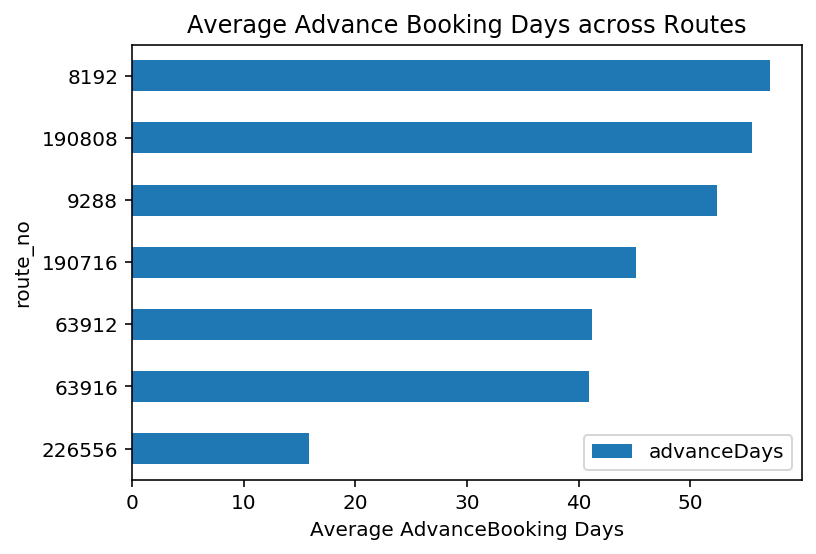

In [28]:
plt.xlabel('Average AdvanceBooking Days')
plt.ylabel('Route No.')
plt.title('Average Advance Booking Days across Routes')
cleanData.groupby(by=['route_no'])['advanceDays'].mean().sort_values().plot(kind = 'barh', legend = True)

For the **least frequent route**, people book tickets **15 days** on average in advance while on the **most frequent routes** (63912, 63916) bookings happen **40 days** on average  in advance. 

###### AdvanceBookings & DepartureTime

In [29]:
cleanData.departure_time.value_counts()

11:00:00    1549
19:00:00     507
18:30:00     449
12:00:00     300
10:15:00     271
07:00:00      85
Name: departure_time, dtype: int64

In [30]:
print("The earliest departure time is {}".format(cleanData.departure_time.min()))
print("The latest departure time is {}".format(cleanData.departure_time.max()))      

The earliest departure time is 0 days 07:00:00
The latest departure time is 0 days 19:00:00


The earliest departure time is **0700 hours** while the latest is **1900 hours**

In [31]:
cleanData.groupby(by=['departure_time','route_no']).agg({'advanceDays':len})

advanceDays
departure_time route_no             
07:00:00       226556           85.0
10:15:00       190716          271.0
11:00:00       63912           768.0
               63916           781.0
12:00:00       190808          300.0
18:30:00       9288            449.0
19:00:00       8192            507.0

###### RouteNo & DepartureTime

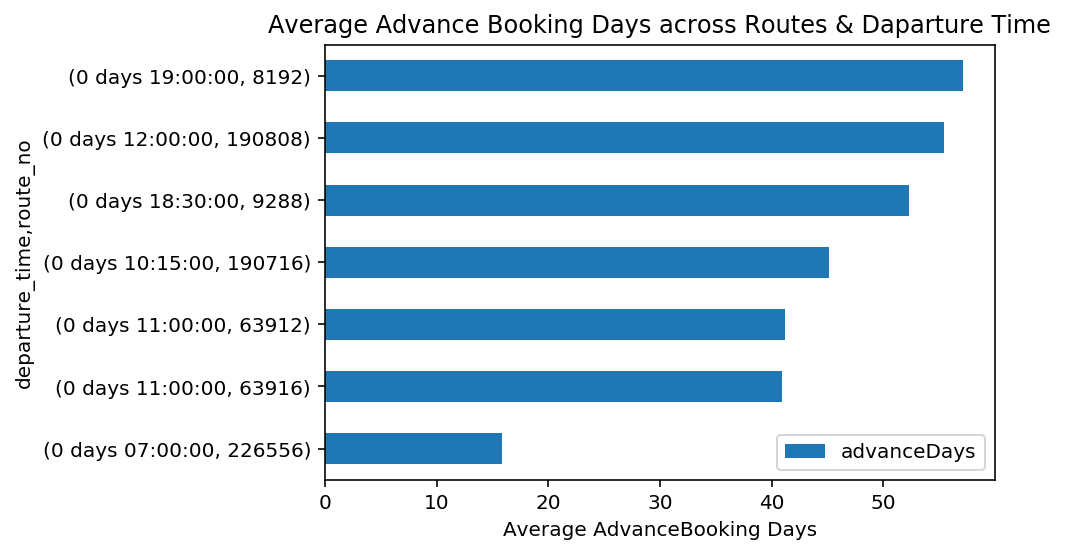

In [32]:
plt.xlabel('Average AdvanceBooking Days')
plt.ylabel('Route No. & Departure Time')
plt.title('Average Advance Booking Days across Routes & Daparture Time')
cleanData.groupby(by=['departure_time','route_no'])['advanceDays'].mean().sort_values().plot(kind = 'barh',legend = True)

At the **least frequent route** (226556) people tend to travel **early in morning (7am)** while on the **most frequent routes** (63912, 63916) prefer to travel **later in the day, 11am.**

##### Does day of the week for travel date influence occupancy for different routes?

In [33]:
cleanData.order_date.max(), cleanData.order_date.min()

(Timestamp('2016-12-08 00:00:00'), Timestamp('2015-01-12 00:00:00'))

In [34]:
cleanData.travel_date.max(), cleanData.travel_date.min()

(Timestamp('2016-12-09 00:00:00'), Timestamp('2015-02-12 00:00:00'))

Passengers made orders between **2015-01-12** to **2016-12-08** for travel between **2015-02-12** to **2016-12-09**

In [35]:
# cleanData.loc[:,'orderDay'] = cleanData.order_date.dt.dayofweek
# cleanData.loc[:,'travelDay'] = cleanData.travel_date.dt.dayofweek
## Gives SettingWithCopyWarning

orderYear = pd.Series(cleanData.order_date.dt.year, name ='orderYear' )
travelYear = pd.Series(cleanData.travel_date.dt.year, name = 'travelYear')
orderMonth= pd.Series(cleanData.order_date.dt.month,name = 'orderMonth')
travelMonth = pd.Series(cleanData.travel_date.dt.month,name = 'travelMonth')
orderDate = pd.Series(cleanData.order_date.dt.day,name = 'orderDate')
travelDate = pd.Series(cleanData.travel_date.dt.day, name = 'travelDate')
orderDay = pd.Series(cleanData.order_date.dt.dayofweek,name = 'orderDay')
travelDay = pd.Series(cleanData.travel_date.dt.dayofweek, name = 'travelDay')
cleanData = pd.concat([cleanData,orderYear,travelYear,orderMonth,travelMonth,orderDate,travelDate,orderDay,travelDay],axis =1)
cleanData.head()

,order_date,route_no,from_stop,to_stop,departure_time,travel_date,passengers_booked_index,advanceDays,orderYear,travelYear,orderMonth,travelMonth,orderDate,travelDate,orderDay,travelDay
0,2015-12-24,8192,2655,2790,19:00:00,2016-02-20,1.28547,58.0,2015,2016,12,2,24,20,3,5
1,2016-02-01,8192,2655,2790,19:00:00,2016-06-02,0.64260,122.0,2016,2016,2,6,1,2,0,3
2,2015-12-26,8192,2655,2790,19:00:00,2016-06-02,0.64260,159.0,2015,2016,12,6,26,2,5,3
3,2016-03-13,8192,2655,2790,19:00:00,2016-12-05,1.92834,267.0,2016,2016,3,12,13,5,6,0
4,2016-03-25,8192,2655,2790,19:00:00,2016-12-05,0.64260,255.0,2016,2016,3,12,25,5,4,0


The day of the week with **Monday=0, Sunday=6**

###### RouteNo and DayOfWeekOfTravel

In [36]:
table = pd.pivot_table(index = ['travelDay','route_no'],values = 'advanceDays',aggfunc = len, data = cleanData).unstack()
table

advanceDays                                          
route_no       8192   9288   63912  63916  190716 190808 226556
travelDay                                                      
0                39.0    6.0  107.0  152.0   52.0   76.0    7.0
1                13.0   92.0  122.0  130.0   34.0   59.0   22.0
2                 3.0  186.0   88.0   99.0   20.0   26.0   23.0
3               208.0   82.0   39.0   34.0    5.0    5.0   18.0
4               131.0   32.0  135.0   88.0   45.0   27.0    NaN
5                94.0   50.0  111.0  102.0   48.0   37.0    5.0
6                19.0    1.0  166.0  176.0   67.0   70.0   10.0

- **Minimum ridership on 63912** is **more** than the **maximum ridership on 226556** on any given day

- **63912** sees **max ridership** near **weekends** i.e. days 5,6,0 & 1. 

- It points that this route connects 2 towns or a town and a weekend getaway.

- Thus passengers use tis route travel back and forth between work location and weekend stays (holiday homes or hometowns)

- Route no. **8192** and **9288** see **max** ridership in **weekdays** thus passengers use them for daily commute between office and home

###### DayOfWeek & Orders

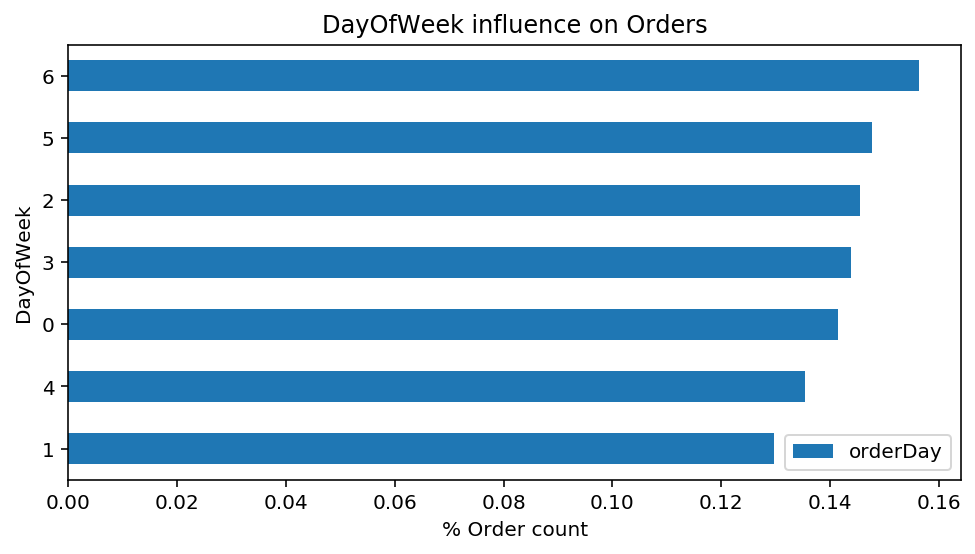

In [37]:
plt.figure(figsize = (8,4))
plt.xlabel('% Order count')
plt.ylabel('DayOfWeek')
plt.title('DayOfWeek influence on Orders')
cleanData.orderDay.value_counts(normalize = True).sort_values().plot(kind='barh',legend = True)

- **Max** orders are placed on **Sunday(6)**
- **Min** orders are placed on **Tuesday(1)**

###### DayOfWeek & Travel

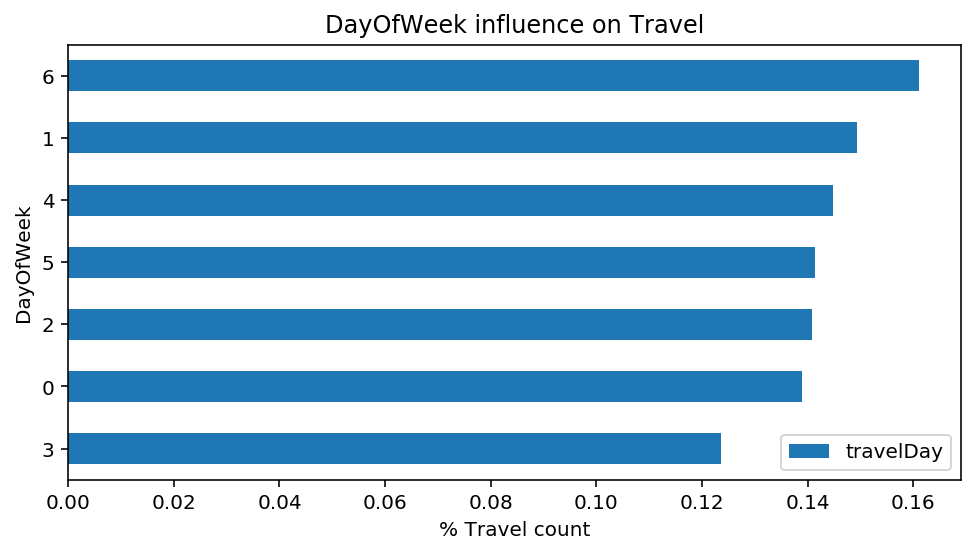

In [38]:
plt.figure(figsize = (8,4))
plt.xlabel('% Travel count')
plt.ylabel('DayOfWeek')
plt.title('DayOfWeek influence on Travel')
cleanData.travelDay.value_counts(normalize = True).sort_values().plot(kind='barh',legend = True)

- **Max** passengers prefer to travel on **Sunday(6)**
- **Min** passengers prefer to travel **Thursday(3)**

###### DateOfMonth & Orders

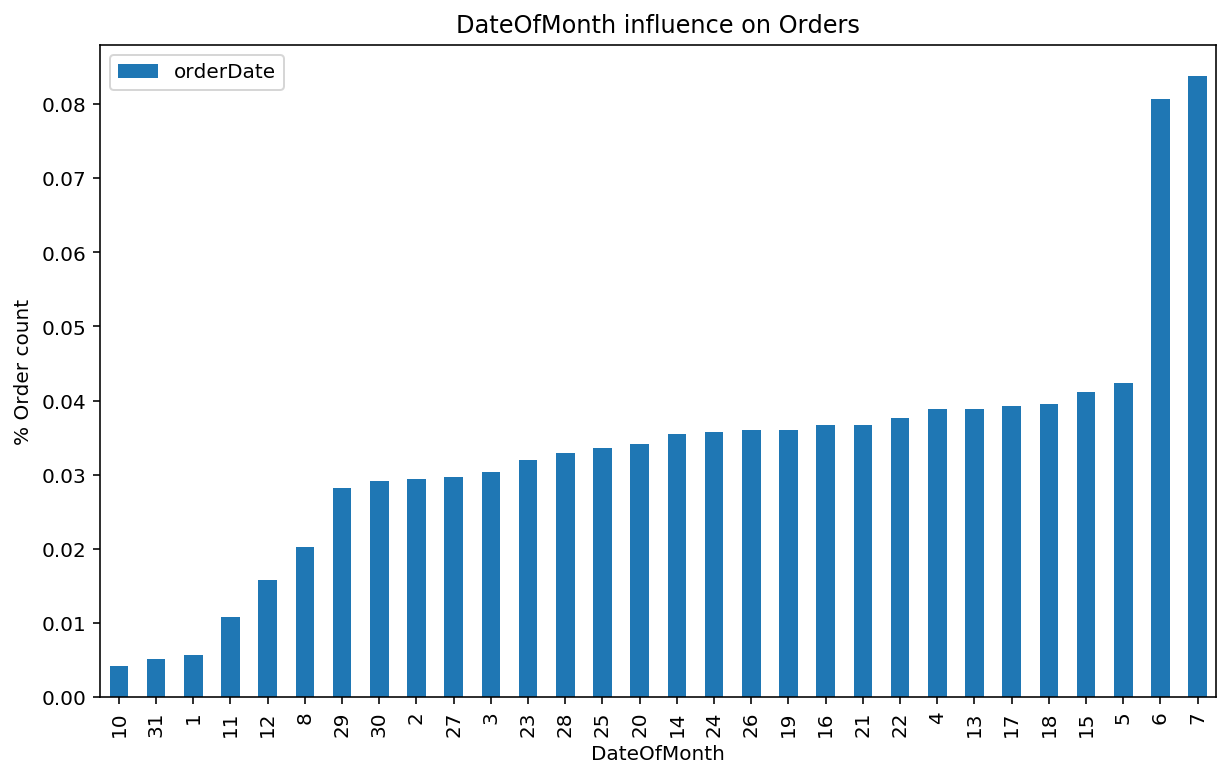

In [39]:
plt.figure(figsize = (10,6))
plt.ylabel('% Order count')
plt.xlabel('DateOfMonth')
plt.title('DateOfMonth influence on Orders')
cleanData.orderDate.value_counts(normalize = True).sort_values().plot(kind='bar', legend = True)

###### DateOfMonth & Travel

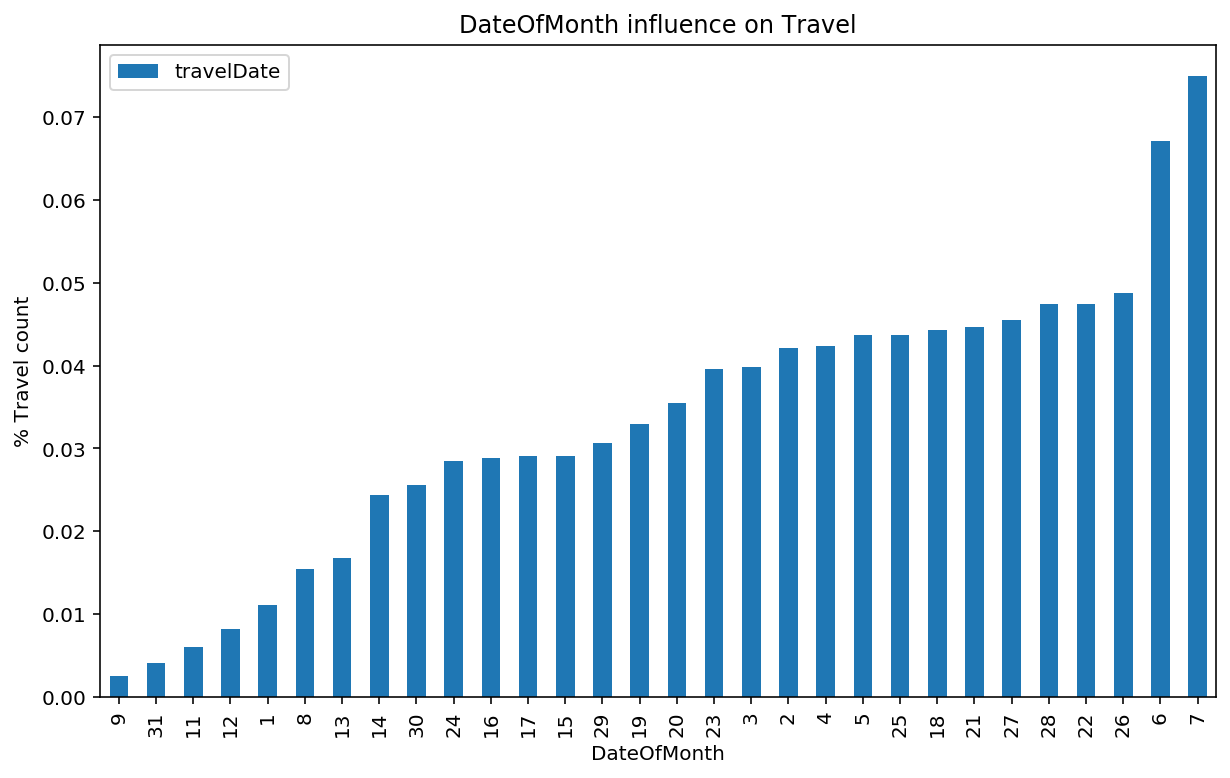

In [40]:
plt.figure(figsize = (10,6))
plt.ylabel('% Travel count')
plt.xlabel('DateOfMonth')
plt.title('DateOfMonth influence on Travel')
cleanData.travelDate.value_counts(normalize = True).sort_values().plot(kind='bar', legend = True)

- Passengers tend to **travel** near **end of month** (25th to 28th)
- For this they make **orders** a **week to 10 days** in advance(13th to 15th)

###### Month & Orders

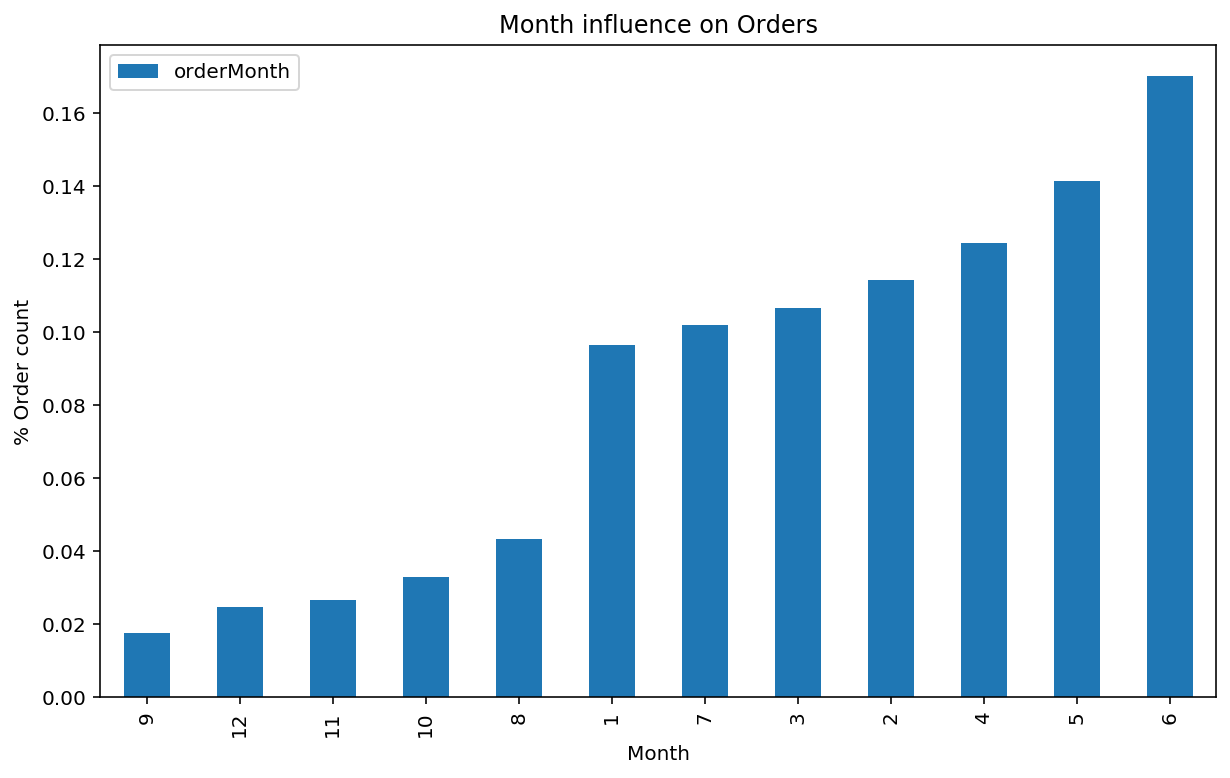

In [41]:
plt.figure(figsize = (10,6))
plt.ylabel('% Order count')
plt.xlabel('Month')
plt.title('Month influence on Orders')
cleanData.orderMonth.value_counts(normalize = True).sort_values().plot(kind='bar', legend = True)

###### Month & travel

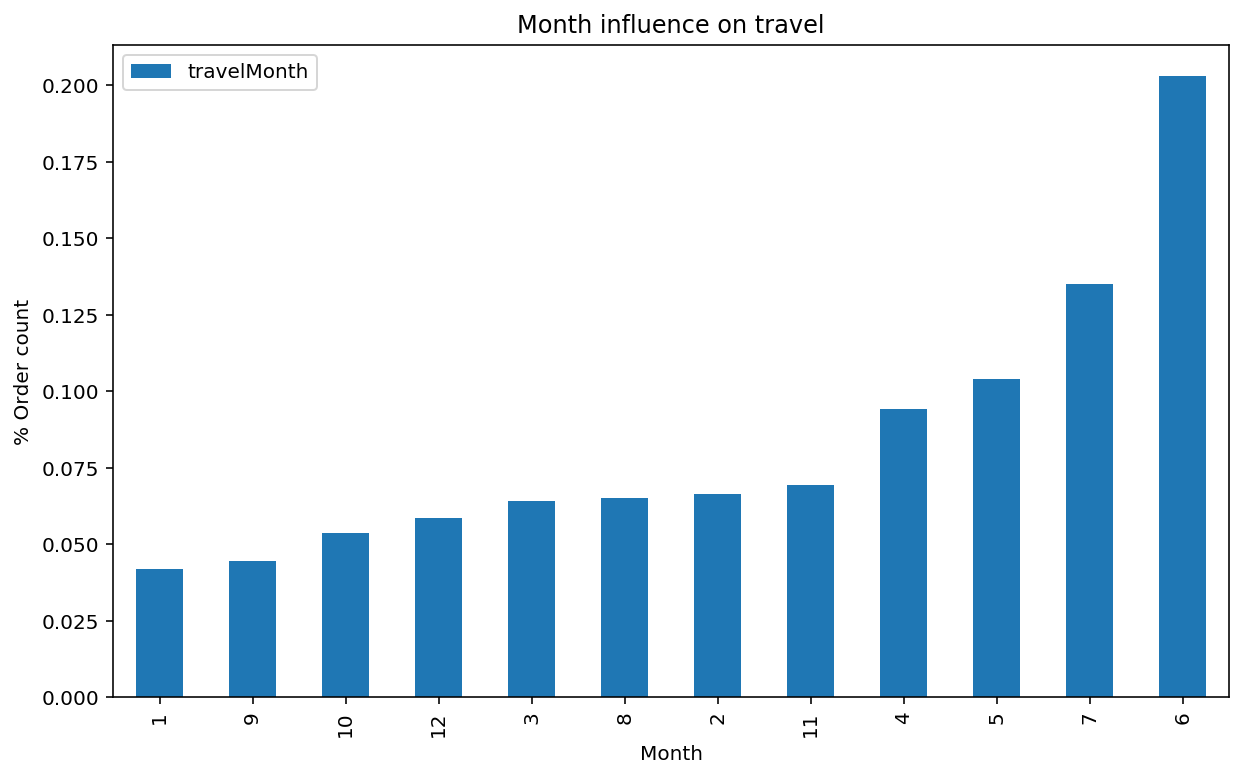

In [42]:
plt.figure(figsize = (10,6))
plt.ylabel('% Order count')
plt.xlabel('Month')
plt.title('Month influence on travel')
cleanData.travelMonth.value_counts(normalize = True).sort_values().plot(kind='bar', legend = True)

- Passengers make **bookings early in the year** i.e. **January to July** (1 to 7) 
- Passengers prefer to **travel mostly near mid year** (4,5,6,7) due to several reasons
 - festive season
 - summer vacation at work/kids
 - less workload
 - seasonal holiday spots
 - pleasant weather

###### Year & Orders

In [43]:
print(cleanData.loc[cleanData.orderYear== 2015, 'order_date'].min())
print(cleanData.loc[cleanData.orderYear== 2015, 'order_date'].max())
print(cleanData.loc[cleanData.orderYear== 2016, 'order_date'].min())
print(cleanData.loc[cleanData.orderYear== 2016, 'order_date'].max())

2015-01-12 00:00:00
2015-12-30 00:00:00
2016-01-01 00:00:00
2016-12-08 00:00:00


In [44]:
cleanData.orderYear.value_counts(normalize=True)

2016    0.915849
2015    0.084151
Name: orderYear, dtype: float64

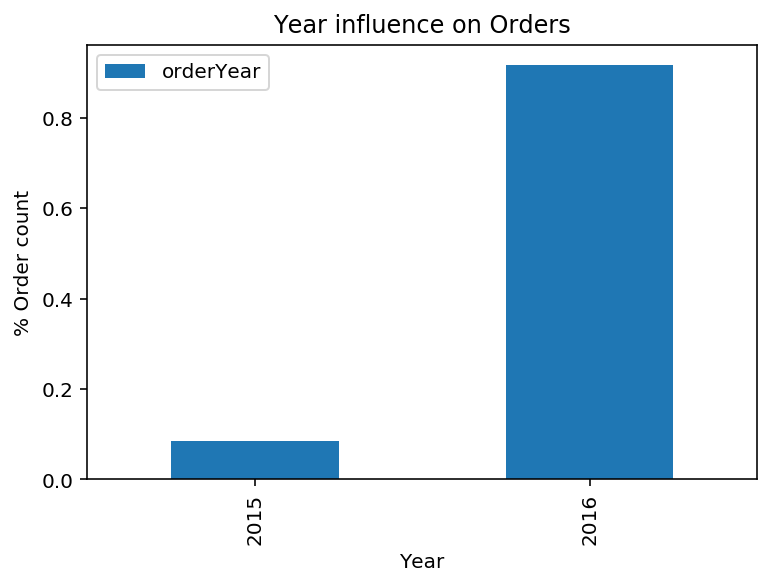

In [45]:
plt.ylabel('% Order count')
plt.xlabel('Year')
plt.title('Year influence on Orders')
cleanData.orderYear.value_counts(normalize=True).sort_values().plot(kind='bar',legend = True)

###### Year & Travel

In [46]:
print(cleanData.loc[cleanData.travelYear== 2015, 'travel_date'].min())
print(cleanData.loc[cleanData.travelYear== 2015, 'travel_date'].max())
print(cleanData.loc[cleanData.travelYear== 2016, 'travel_date'].min())
print(cleanData.loc[cleanData.travelYear== 2016, 'travel_date'].max())

2015-02-12 00:00:00
2015-12-30 00:00:00
2016-01-02 00:00:00
2016-12-09 00:00:00


In [47]:
cleanData.travelYear.value_counts(normalize=True)

2016    0.928504
2015    0.071496
Name: travelYear, dtype: float64

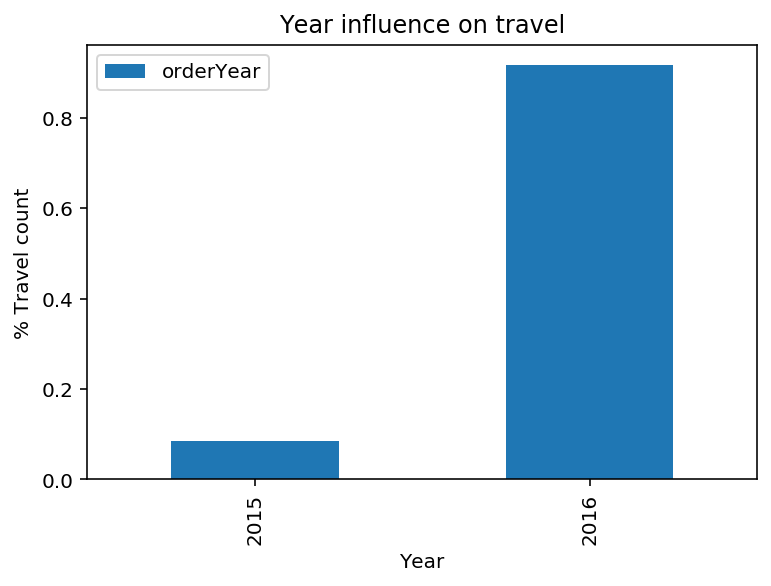

In [48]:
plt.ylabel('% Travel count')
plt.xlabel('Year')
plt.title('Year influence on travel')
cleanData.orderYear.value_counts(normalize=True).sort_values().plot(kind='bar',legend = True)

In [49]:
print(cleanData.loc[cleanData.orderYear== 2015, 'order_date'].count())
print(cleanData.loc[cleanData.orderYear== 2016, 'order_date'].count())

266
2895


Thus bookings grew from **266 in 2015** to **2895 in 2016** which is **~10times increase**